<a href="https://colab.research.google.com/github/lancedsouza/Triangular-numbers/blob/main/ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

In [ ]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
for i in train_samples:
    print(i)

62
88
59
68
30
93
23
84
36
78
32
80
43
83
48
95
21
79
55
90
23
65
25
67
61
72
39
97
55
99
27
88
41
82
23
90
47
78
53
77
47
96
41
80
63
76
34
95
62
93
25
84
30
67
17
98
39
98
37
79
38
80
29
98
16
77
50
73
34
73
36
69
56
65
55
85
22
86
38
74
32
73
49
98
32
75
34
78
48
81
63
97
44
81
43
94
17
77
33
87
63
95
49
92
54
90
36
82
45
68
50
96
28
83
23
71
25
98
43
88
59
92
44
94
62
87
42
72
14
94
29
93
29
100
28
77
23
81
56
84
19
76
62
86
33
82
60
87
28
90
34
81
41
96
58
93
15
83
32
70
29
87
55
70
30
91
27
79
60
83
38
81
40
70
16
76
16
76
58
80
61
65
19
65
40
73
56
91
60
76
61
70
41
69
13
93
50
67
36
74
33
76
41
86
58
79
33
87
35
69
46
77
25
69
36
81
24
90
52
91
46
73
26
79
64
92
30
86
28
67
36
93
54
91
44
79
44
88
49
84
31
85
32
85
46
65
44
100
51
97
50
70
16
67
16
70
45
70
62
69
30
80
44
84
40
88
63
97
62
75
46
90
30
87
54
78
44
75
60
94
48
79
39
83
51
81
39
66
44
97
51
70
53
67
56
66
44
89
38
92
32
69
34
96
43
83
31
69
24
96
38
80
60
93
32
66
20
66
48
82
18
67
51
83
61
92
55
68
54
72
45
93
28

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [21]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
              


In [20]:
model.fit(
    x=scaled_train_samples, 
    y=train_labels, 
    validation_split=0.1,
    batch_size=10, 
    epochs=30, 
    shuffle=True, 
    verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.2330 - accuracy: 0.9434 - val_loss: 0.2402 - val_accuracy: 0.9476 - 438ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2327 - accuracy: 0.9434 - val_loss: 0.2404 - val_accuracy: 0.9476 - 276ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2324 - accuracy: 0.9434 - val_loss: 0.2396 - val_accuracy: 0.9476 - 273ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2321 - accuracy: 0.9434 - val_loss: 0.2402 - val_accuracy: 0.9476 - 289ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2318 - accuracy: 0.9434 - val_loss: 0.2388 - val_accuracy: 0.9476 - 317ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2316 - accuracy: 0.9434 - val_loss: 0.2393 - val_accuracy: 0.9476 - 267ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2314 - accuracy: 0.9434 - val_loss: 0.2389 - val_accuracy: 0.9476 - 315ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2310 - accuracy: 0.9434 - val_loss: 0.2389 - val_accuracy: 0.9476 - 271ms/epoch - 1ms/step


In [23]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [24]:
for i in predictions:
    print(i)


[0.04262998 0.95737   ]
[0.01221914 0.9877808 ]
[0.31810415 0.68189585]
[0.25209963 0.7479004 ]
[0.0543994  0.94560057]
[0.96566707 0.03433286]
[0.9656863  0.03431363]
[0.08761285 0.91238713]
[0.0501705  0.94982946]
[0.13814217 0.86185783]
[0.96573746 0.03426253]
[0.9628502  0.03714981]
[0.07488851 0.92511153]
[0.9656863  0.03431363]
[0.08102322 0.91897684]
[0.96566707 0.03433286]
[0.9660678  0.03393221]
[0.55288815 0.44711185]
[0.63118273 0.3688173 ]
[0.03331719 0.96668285]
[0.94974345 0.05025661]
[0.06918336 0.93081665]
[0.11903676 0.88096327]
[0.8193779  0.18062209]
[0.9628502  0.03714981]
[0.9658649  0.03413512]
[0.96573746 0.03426253]
[0.8193779  0.18062209]
[0.19585672 0.8041433 ]
[0.02390784 0.97609216]
[0.8626039  0.13739613]
[0.94974345 0.05025661]
[0.030674   0.96932596]
[0.55288815 0.44711185]
[0.05896266 0.9410373 ]
[0.92254037 0.07745966]
[0.96566075 0.0343392 ]
[0.13814217 0.86185783]
[0.96566707 0.03433286]
[0.12828644 0.8717136 ]
[0.8193779  0.18062209]
[0.96614355 0.03

In [25]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
0


In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [31]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


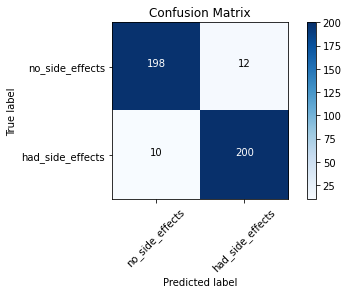

In [33]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')